In [1]:
import numpy as np
import pandas as pd
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import datasets
import cv2
import os
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
# Read the CSV file containing image data
df = pd.read_csv('ckextended.csv')

# Define the target resolution for resizing
target_resolution = (48, 48)

# Create a directory to save the preprocessed images
output_directory = 'preprocessed_images'
os.makedirs(output_directory, exist_ok=True)

# Iterate through each row in the CSV
for index, row in df.iterrows():
    # Extract the image data from the CSV cell
    image_data = np.fromstring(row[1], sep=' ')
    image_data = image_data.reshape((48, 48))

    # Save the preprocessed image to the output directory
    output_filename = f'{output_directory}/preprocessed_image_{index}.png'
    cv2.imwrite(output_filename, image_data)

In [3]:
df

,emotion,pixels,Usage
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training
...,...,...,...
897,5,87 86 88 92 92 127 231 248 251 253 254 254 254...,PrivateTest
898,5,21 24 26 28 27 28 30 8 0 0 0 0 0 0 1 4 37 42 4...,PrivateTest
899,5,76 40 31 38 28 34 38 36 41 36 46 38 44 26 45 5...,PrivateTest
900,5,114 87 16 29 17 25 30 34 37 35 45 93 63 80 73 ...,PrivateTest


In [4]:
# Specify the directory where preprocessed images are stored
input_directory = 'preprocessed_images'

# Load preprocessed images and labels
images = []
labels = []

for filename in os.listdir(input_directory):
    if filename.endswith('.png'):
        # Read the image and extract label from the filename
        image = cv2.imread(os.path.join(input_directory, filename), cv2.IMREAD_GRAYSCALE)     
        images.append(image)
        

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(df['emotion'])

# Flatten each image to a 1D array
images = images.reshape(images.shape[0], -1)

# Apply PCA for dimensionality reduction
num_components = 100  # Adjust the number of components as needed
pca = PCA(n_components=num_components)
reduced_images = pca.fit_transform(images)

# Label encoding for class labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Store the reduced features and labels in a CSV file
output_file = 'reduced_features.csv'
reduced_data = np.column_stack((reduced_images, encoded_labels))
np.savetxt(output_file, reduced_data, delimiter=',', header='Feature1,Feature2,Label', comments='')

print(f'PCA and LDA completed. Reduced features saved to {output_file}.')

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 920 and the array at index 1 has size 902

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the reduced features and labels from the CSV file
data = np.loadtxt('reduced_features.csv', delimiter=',', skiprows=1)
X = data[:, :-1]
y = data[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train, y_train)

# Make predictions with the SVM classifier
svm_predictions = svm_classifier.predict(X_test)

# Calculate SVM accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')

# Train a neural network
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the neural network on the test data
nn_loss, nn_accuracy = model.evaluate(X_test, y_test)
print(f'Neural Network Accuracy: {nn_accuracy * 100:.2f}%')


SVM Accuracy: 69.57%
Epoch 1/10
19/19 [==============================] - 1s 9ms/step - loss: -1864.9281 - accuracy: 0.0544 - val_loss: -4736.6025 - val_accuracy: 0.0946
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: -10344.4922 - accuracy: 0.0544 - val_loss: -18734.7207 - val_accuracy: 0.0946
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: -36461.6914 - accuracy: 0.0544 - val_loss: -59268.9062 - val_accuracy: 0.0946
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: -106808.1250 - accuracy: 0.0544 - val_loss: -159363.3438 - val_accuracy: 0.0946
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: -266499.8438 - accuracy: 0.0544 - val_loss: -372223.6562 - val_accuracy: 0.0946
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: -591697.1875 - accuracy: 0.0544 - val_loss: -772429.9375 - val_accuracy: 0.0946
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: -11

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the reduced features and labels from the CSV file
data = np.loadtxt('reduced_features.csv', delimiter=',', skiprows=1)
X = data[:, :-1]
y = data[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier for multiclass
svm_classifier = SVC(kernel='rbf', C=1.0, decision_function_shape='ovr')
svm_classifier.fit(X_train, y_train)

# Make predictions with the SVM classifier
svm_predictions = svm_classifier.predict(X_test)

# Calculate SVM accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')

# Train a neural network for multiclass
num_classes = 8  # The number of classes
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Use softmax for multiclass
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the neural network
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the neural network on the test data
nn_loss, nn_accuracy = model.evaluate(X_test, y_test)
print(f'Neural Network Accuracy: {nn_accuracy * 100:.2f}%')


SVM Accuracy: 69.57%
Epoch 1/10
19/19 [==============================] - 0s 6ms/step - loss: 38.7638 - accuracy: 0.4439 - val_loss: 18.5372 - val_accuracy: 0.4459
Epoch 2/10
19/19 [==============================] - 0s 3ms/step - loss: 12.3158 - accuracy: 0.5374 - val_loss: 12.6819 - val_accuracy: 0.5676
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 6.1394 - accuracy: 0.6037 - val_loss: 9.2923 - val_accuracy: 0.4730
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 3.5882 - accuracy: 0.6071 - val_loss: 9.4970 - val_accuracy: 0.5405
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 2.8605 - accuracy: 0.6139 - val_loss: 8.5857 - val_accuracy: 0.5946
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 2.0666 - accuracy: 0.7041 - val_loss: 7.4849 - val_accuracy: 0.5473
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 1.4024 - accuracy: 0.7381 - val_loss: 7.3355 - val_accuracy: 0.

In [19]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

# Load the reduced features and labels from the CSV file
data = np.loadtxt('reduced_features.csv', delimiter=',', skiprows=1)
X = data[:, :-1]
y = data[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

# Evaluate SVM performance
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

print("SVM Metrics:")
print(f"Accuracy: {svm_accuracy * 100:.2f}%")
print(f"Precision: {svm_precision * 100:.2f}%")
print(f"Recall: {svm_recall * 100:.2f}%")
print(f"F1 Score: {svm_f1 * 100:.2f}%")

# Neural network classifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000)
nn_classifier.fit(X_train, y_train)
nn_predictions = nn_classifier.predict(X_test)

# Evaluate neural network performance
nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_precision = precision_score(y_test, nn_predictions)
nn_recall = recall_score(y_test, nn_predictions)
nn_f1 = f1_score(y_test, nn_predictions)

print("\nNeural Network Metrics:")
print(f"Accuracy: {nn_accuracy * 100:.2f}%")
print(f"Precision: {nn_precision * 100:.2f}%")
print(f"Recall: {nn_recall * 100:.2f}%")
print(f"F1 Score: {nn_f1 * 100:.2f}%")

# Cross-validation for SVM
svm_scores = cross_val_score(svm_classifier, X, y_encoded, cv=5, scoring='accuracy')
print("\nSVM Cross-Validation Accuracy:")
print(svm_scores)

# Cross-validation for Neural Network
nn_scores = cross_val_score(nn_classifier, X, y_encoded, cv=5, scoring='accuracy')
print("\nNeural Network Cross-Validation Accuracy:")
print(nn_scores)


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [7]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

# Load the reduced features and labels from the CSV file
data = np.loadtxt('reduced_features.csv', delimiter=',', skiprows=1)
X = data[:, :-1]
y = data[:, -1]

# Encode class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# SVM classifier for multiclass
svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

# Evaluate SVM performance for multiclass
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_micro_precision = precision_score(y_test, svm_predictions, average='micro')
svm_macro_precision = precision_score(y_test, svm_predictions, average='macro')
svm_micro_recall = recall_score(y_test, svm_predictions, average='micro')
svm_macro_recall = recall_score(y_test, svm_predictions, average='macro')
svm_micro_f1 = f1_score(y_test, svm_predictions, average='micro')
svm_macro_f1 = f1_score(y_test, svm_predictions, average='macro')

print("SVM Metrics for Multiclass:")
print(f"Accuracy: {svm_accuracy * 100:.2f}%")
print(f"Micro Precision: {svm_micro_precision * 100:.2f}%")
print(f"Macro Precision: {svm_macro_precision * 100:.2f}%")
print(f"Micro Recall: {svm_micro_recall * 100:.2f}%")
print(f"Macro Recall: {svm_macro_recall * 100:.2f}%")
print(f"Micro F1 Score: {svm_micro_f1 * 100:.2f}%")
print(f"Macro F1 Score: {svm_macro_f1 * 100:.2f}%")

# Neural network classifier for multiclass
nn_classifier = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000)
nn_classifier.fit(X_train, y_train)
nn_predictions = nn_classifier.predict(X_test)

# Evaluate neural network performance for multiclass
nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_micro_precision = precision_score(y_test, nn_predictions, average='micro')
nn_macro_precision = precision_score(y_test, nn_predictions, average='macro')
nn_micro_recall = recall_score(y_test, nn_predictions, average='micro')
nn_macro_recall = recall_score(y_test, nn_predictions, average='macro')
nn_micro_f1 = f1_score(y_test, nn_predictions, average='micro')
nn_macro_f1 = f1_score(y_test, nn_predictions, average='macro')

print("\nNeural Network Metrics for Multiclass:")
print(f"Accuracy: {nn_accuracy * 100:.2f}%")
print(f"Micro Precision: {nn_micro_precision * 100:.2f}%")
print(f"Macro Precision: {nn_macro_precision * 100:.2f}%")
print(f"Micro Recall: {nn_micro_recall * 100:.2f}%")
print(f"Macro Recall: {nn_macro_recall * 100:.2f}%")
print(f"Micro F1 Score: {nn_micro_f1 * 100:.2f}%")
print(f"Macro F1 Score: {nn_macro_f1 * 100:.2f}%")

# Cross-validation for SVM
svm_scores = cross_val_score(svm_classifier, X, y_encoded, cv=5, scoring='accuracy')
print("\nSVM Cross-Validation Accuracy:")
print(svm_scores)

# Cross-validation for Neural Network
nn_scores = cross_val_score(nn_classifier, X, y_encoded, cv=5, scoring='accuracy')
print("\nNeural Network Cross-Validation Accuracy:")
print(nn_scores)


C:\Users\rishi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Metrics for Multiclass:
Accuracy: 69.57%
Micro Precision: 69.57%
Macro Precision: 19.89%
Micro Recall: 69.57%
Macro Recall: 19.44%
Micro F1 Score: 69.57%
Macro F1 Score: 18.76%

Neural Network Metrics for Multiclass:
Accuracy: 54.89%
Micro Precision: 54.89%
Macro Precision: 21.51%
Micro Recall: 54.89%
Macro Recall: 23.60%
Micro F1 Score: 54.89%
Macro F1 Score: 22.14%

SVM Cross-Validation Accuracy:
[0.71195652 0.70108696 0.68478261 0.68478261 0.54891304]

Neural Network Cross-Validation Accuracy:
[0.58695652 0.55434783 0.5        0.5326087  0.40217391]


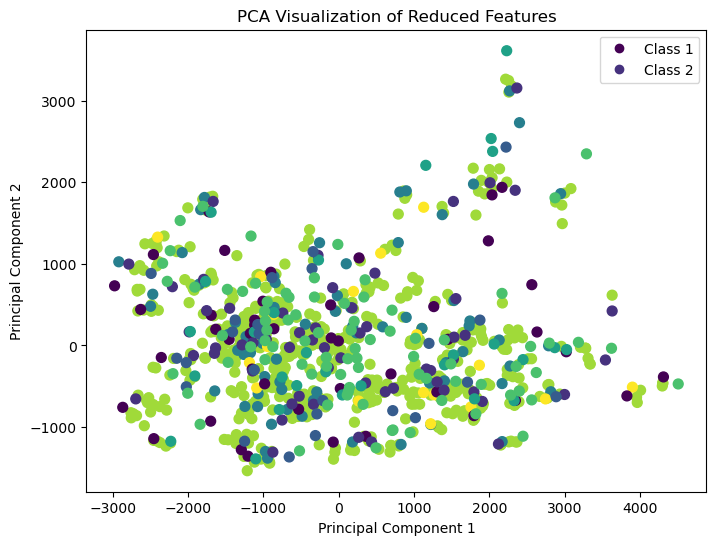

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the reduced PCA features from the CSV file
data = np.loadtxt('reduced_features.csv', delimiter=',', skiprows=1)
X = data[:, :-1]
y = data[:, -1]

# Apply PCA for visualization (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot for visualizing the data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', marker='o', s=50)
plt.title('PCA Visualization of Reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
legend_labels = ['Class 1', 'Class 2']  # Replace with actual class labels
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()


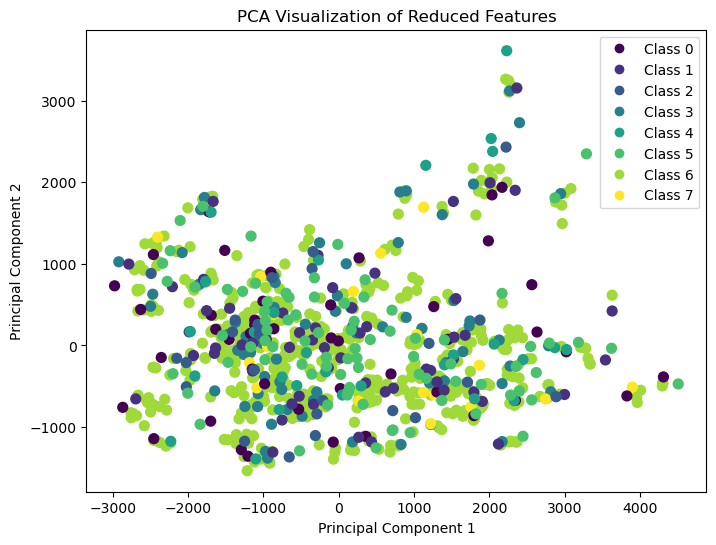

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the reduced PCA features from the CSV file
data = np.loadtxt('reduced_features.csv', delimiter=',', skiprows=1)
X = data[:, :-1]
y = data[:, -1]

# Apply PCA for visualization (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot for visualizing the data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', marker='o', s=50)
plt.title('PCA Visualization of Reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
# You can replace the legend labels with actual class labels for your 8 classes
legend_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()


In [27]:
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import label_expression

# Load the trained PCA model and SVM model
pca = PCA(n_components=100)  # Adjust the number of components as needed
svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train, y_train)  # Assuming you have training data

# Function to preprocess and predict expressions
def predict_expression():
    file_path = filedialog.askopenfilename()
    if file_path:
        # Load and preprocess the uploaded image
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (48, 48))
        image = image.reshape(1, -1)
        
        # Apply PCA for dimensionality reduction
        reduced_features = pca.transform(image)

        # Predict the facial expression using the SVM classifier
        prediction = svm_classifier.predict(reduced_features)

        # Display the predicted expression
        predicted_expression.set(label_expression.get_label(prediction[0]))

# Create the main application window
app = tk.Tk()
app.title("Facial Expression Recognition")

# Create a button to upload an image
upload_button = ttk.Button(app, text="Upload Image", command=predict_expression)
upload_button.pack(pady=20)

# Label to display the predicted expression
predicted_expression = tk.StringVar()
expression_label = ttk.Label(app, textvariable=predicted_expression, font=("Helvetica", 16))
expression_label.pack(pady=20)

app.mainloop()


ModuleNotFoundError: No module named 'label_expression'

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Load the trained PCA model and SVM model
pca = PCA(n_components=100)  # Adjust the number of components as needed
svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train, y_train)  # Assuming you have training data

# Function to preprocess and predict expressions
def predict_expression():
    file_path = filedialog.askopenfilename()
    if file_path:
        # Load and preprocess the uploaded image
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (48, 48))
        image = image.reshape(1, -1)
        
        # Apply PCA for dimensionality reduction
        reduced_features = pca.transform(image)

        # Predict the facial expression using the SVM classifier
        prediction = svm_classifier.predict(reduced_features)

        # Map class labels to expression labels (customize this as needed)
        expression_labels = {0: 'Expression 1', 1: 'Expression 2',2: 'Expression 3', 3: 'Expression 4',4: 'Expression 5', 5: 'Expression 6',6: 'Expression 6', 7: 'Expression 8'}
        predicted_expression.set(expression_labels.get(prediction[0], 'Unknown Expression'))

# Create the main application window
app = tk.Tk()
app.title("Facial Expression Recognition")

# Create a button to upload an image
upload_button = ttk.Button(app, text="Upload Image", command=predict_expression)
upload_button.pack(pady=20)

# Label to display the predicted expression
predicted_expression = tk.StringVar()
expression_label = ttk.Label(app, textvariable=predicted_expression, font=("Helvetica", 16))
expression_label.pack(pady=20)

app.mainloop()


In [9]:
# Load the trained PCA model and SVM model
pca = PCA(n_components=100)  # Adjust the number of components as needed
svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train, y_train)  # Assuming you have training data

# Function to predict facial expressions from live video
def predict_expression():
    cap = cv2.VideoCapture(0)  # Open the default camera (usually the built-in webcam)

    while True:
        ret, frame = cap.read()  # Read a frame from the camera
        if not ret:
            break

        # Preprocess the frame
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        resized_frame = cv2.resize(gray_frame, (48, 48))
        flattened_frame = resized_frame.reshape(1, -1)
        
        # Apply PCA for dimensionality reduction
        reduced_features = pca.transform(flattened_frame)

        # Predict the facial expression using the SVM classifier
        prediction = svm_classifier.predict(reduced_features)

        # Map class labels to expression labels (customize this as needed)
        expression_labels = {0: 'Expression 1', 1: 'Expression 2', 2: 'Expression 3', 3: 'Expression 4', 4: 'Expression 5', 5: 'Expression 6', 6: 'Expression 6', 7: 'Expression 8'}
        predicted_expression.set(expression_labels.get(prediction[0], 'Unknown Expression'))

        # Display the live video feed with the predicted expression
        cv2.imshow('Live Facial Expression Recognition', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit the application
            break

    cap.release()
    cv2.destroyAllWindows()

# Create the main application window
app = tk.Tk()
app.title("Facial Expression Recognition")

# Create a button to start live prediction
start_button = ttk.Button(app, text="Start Live Prediction", command=predict_expression)
start_button.pack(pady=20)

# Label to display the predicted expression
predicted_expression = tk.StringVar()
expression_label = ttk.Label(app, textvariable=predicted_expression, font=("Helvetica", 16))
expression_label.pack(pady=20)

app.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\rishi\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\rishi\AppData\Local\Temp\ipykernel_2288\2086121994.py", line 21, in predict_expression
    reduced_features = pca.transform(flattened_frame)
  File "C:\Users\rishi\anaconda3\lib\site-packages\sklearn\decomposition\_base.py", line 115, in transform
    check_is_fitted(self)
  File "C:\Users\rishi\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1222, in check_is_fitted
    raise NotFittedError(msg % {"name": type(estimator).__name__})
sklearn.exceptions.NotFittedError: This PCA instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\rishi\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\rishi\AppData\Local\Temp\

In [11]:
%pip install mediapipe

     -------------------------------------- 50.3/50.3 MB 417.2 kB/s eta 0:00:00
     -------------------------------------- 44.8/44.8 MB 395.5 kB/s eta 0:00:00
     ------------------------------------ 199.7/199.7 kB 712.3 kB/s eta 0:00:00
     ------------------------------------ 904.2/904.2 kB 386.7 kB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.24.3
    Uninstalling protobuf-4.24.3:
      Successfully uninstalled protobuf-4.24.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\rishi\\anaconda3\\Lib\\site-packages\\google\\~upb\\_message.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [10]:
import cv2
import mediapipe as mp

# Load the trained PCA model and SVM model
pca = PCA(n_components=100)  # Adjust the number of components as needed
svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train, y_train)  # Assuming you have training data

# Function to predict facial expressions from live video
def predict_expression():

    # Initialize the MediaPipe Face Mesh detector
    face_mesh = mp.solutions.face_mesh.FaceMesh(
        max_num_faces=1,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5)

    # Create a OpenCV VideoCapture object to capture the live video feed
    cap = cv2.VideoCapture(0)

    while True:

        # Read a frame from the camera
        ret, frame = cap.read()

        if not ret:
            break

        # Process the frame with the MediaPipe Face Mesh detector
        results = face_mesh.process(image=frame)

        # If a face is detected, extract the facial landmarks
        if results.multi_face_landmarks:
            face_landmarks = results.multi_face_landmarks[0].landmark

            # Preprocess the facial landmarks
            landmark_array = []
            for landmark in face_landmarks:
                landmark_array.append([landmark.x, landmark.y])
            flattened_array = np.array(landmark_array).reshape(1, -1)

            # Apply PCA for dimensionality reduction
            reduced_features = pca.transform(flattened_array)

            # Predict the facial expression using the SVM classifier
            prediction = svm_classifier.predict(reduced_features)

            # Map class labels to expression labels (customize this as needed)
            expression_labels = {0: 'Expression 1', 1: 'Expression 2', 2: 'Expression 3', 3: 'Expression 4', 4: 'Expression 5', 5: 'Expression 6', 6: 'Expression 6', 7: 'Expression 8'}
            predicted_expression.set(expression_labels.get(prediction[0], 'Unknown Expression'))

        # Display the live video feed with the predicted expression
        cv2.imshow('Live Facial Expression Recognition', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit the application
            break

    cap.release()
    cv2.destroyAllWindows()

# Create the main application window
app = tk.Tk()
app.title("Facial Expression Recognition")

# Create a button to start live prediction
start_button = ttk.Button(app, text="Start Live Prediction", command=predict_expression)
start_button.pack(pady=20)

# Label to display the predicted expression
predicted_expression = tk.StringVar()
expression_label = ttk.Label(app, textvariable=predicted_expression, font=("Helvetica", 16))
expression_label.pack(pady=20)

app.mainloop()

ModuleNotFoundError: No module named 'mediapipe'

In [ ]:
import tkinter as tk
from tkinter import ttk
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import concurrent.futures

# Load the trained PCA model and SVM model
pca = PCA(n_components=50)  # Reduce the number of components
svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train, y_train)  # Assuming you have training data

# Function to predict facial expressions from live video
def predict_expression():
    cap = cv2.VideoCapture(0)  # Open the default camera (usually the built-in webcam)

    frame_batch = []
    batch_size = 10  # Number of frames to process in each batch

    while True:
        ret, frame = cap.read()  # Read a frame from the camera
        if not ret:
            break

        # Preprocess the frame
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        resized_frame = cv2.resize(gray_frame, (48, 48))
        flattened_frame = resized_frame.reshape(1, -1)
        frame_batch.append(flattened_frame)

        if len(frame_batch) == batch_size:
            # Process the batch of frames
            predict_batch(frame_batch)
            frame_batch = []

        # Display the live video feed
        cv2.imshow('Live Facial Expression Recognition', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit the application
            break

    cap.release()
    cv2.destroyAllWindows()

def predict_batch(batch):
    batch = np.vstack(batch)  # Stack frames into a 2D array
    reduced_features = pca.transform(batch)
    predictions = svm_classifier.predict(reduced_features)

    for prediction in predictions:
        # Map class labels to expression labels (customize this as needed)
        expression_labels = {0: 'Expression 1', 1: 'Expression 2', 2: 'Expression 3', 3: 'Expression 4', 4: 'Expression 5', 5: 'Expression 6', 6: 'Expression 6', 7: 'Expression 8'}
        predicted_expression.set(expression_labels.get(prediction, 'Unknown Expression'))

# Create the main application window
app = tk.Tk()
app.title("Facial Expression Recognition")

# Create a button to start live prediction
start_button = ttk.Button(app, text="Start Live Prediction", command=predict_expression)
start_button.pack(pady=20)

# Label to display the predicted expression
predicted_expression = tk.StringVar()
expression_label = ttk.Label(app, textvariable=predicted_expression, font=("Helvetica", 16))
expression_label.pack(pady=20)

app.mainloop()


In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import label_expression

# Load the trained PCA model and SVM model
pca = PCA(n_components=100)  # Adjust the number of components as needed
svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train, y_train)  # Assuming you have training data

# Function to preprocess and predict expressions
def predict_expression():
    file_path = filedialog.askopenfilename()
    if file_path:
        # Load and preprocess the uploaded image
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (48, 48))
        image = image.reshape(1, -1)
        
        # Apply PCA for dimensionality reduction
        reduced_features = pca.transform(image)

        # Predict the facial expression using the SVM classifier
        prediction = svm_classifier.predict(reduced_features)

        # Display the predicted expression
        predicted_expression.set(label_expression.get_label(prediction[0]))

# Create the main application window
app = tk.Tk()
app.title("Facial Expression Recognition - Testing")

# Create a button to upload an image for testing
upload_button = ttk.Button(app, text="Test Image", command=predict_expression)
upload_button.pack(pady=20)

# Label to display the predicted expression
predicted_expression = tk.StringVar()
expression_label = ttk.Label(app, textvariable=predicted_expression, font=("Helvetica", 16))
expression_label.pack(pady=20)

app.mainloop()
